<a href="https://colab.research.google.com/github/Manjirii07/mlproject/blob/main/Houseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/archive (1).zip')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(df[['sqft_living', 'bedrooms', 'bathrooms', 'price']].head())

   sqft_living  bedrooms  bathrooms     price
0         1180         3       1.00  221900.0
1         2570         3       2.25  538000.0
2          770         2       1.00  180000.0
3         1960         4       3.00  604000.0
4         1680         3       2.00  510000.0


In [ ]:
# Use only the required columns
data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price']]

In [ ]:
# X = input features, y = target variable Independent & Dependent features
X = data[['sqft_living', 'bedrooms', 'bathrooms']]
y = data['price']

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient or slope: [   305.64613097 -56373.55481765  11296.92029198]
Intercept: 69884.2955837939


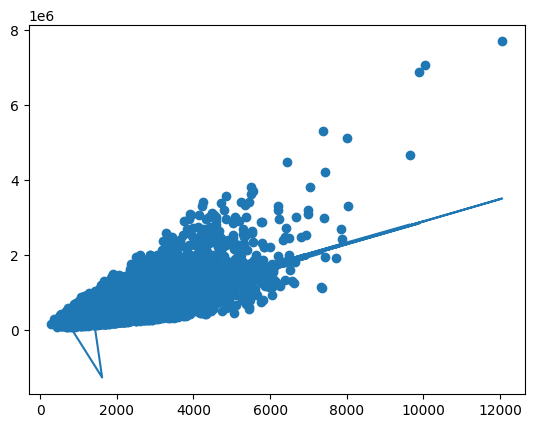

In [ ]:
##plot Training data plot best fit line
plt.scatter(X_train['sqft_living'],y_train)
plt.plot(X_train['sqft_living'],model.predict(X_train))

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 74237634953.1832
R² Score: 0.5089347172264876


In [ ]:
comparison = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(comparison.head(10))


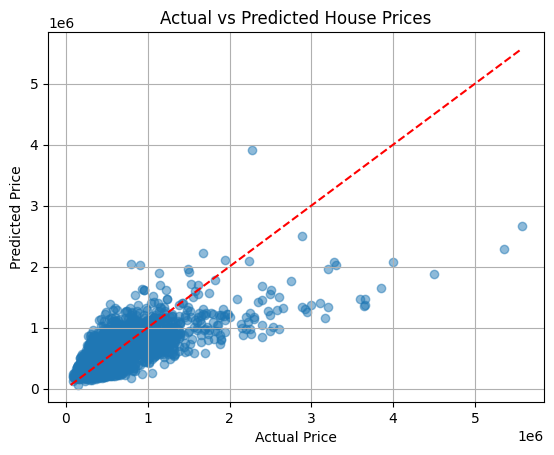

In [ ]:
import numpy as np

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')  # red dashed diagonal

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
